In [1]:
import pandas as pd

df = pd.read_csv(r"F:\telcocustomerchurn\telco customer churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
import numpy as np
df.replace(" ", np.nan, inplace=True)


In [6]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace=True)


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


In [9]:
df['Churn'].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

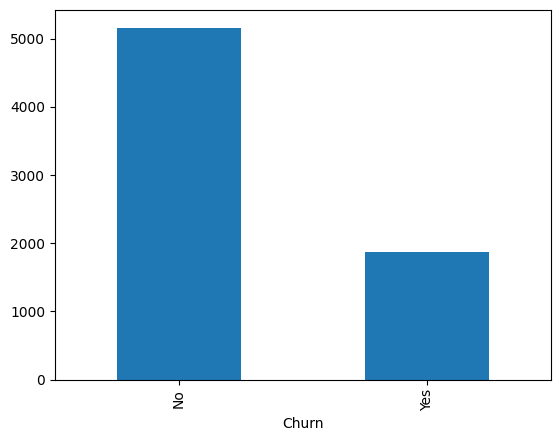

In [10]:
df['Churn'].value_counts().plot(kind='bar')


In [11]:
df.corr(numeric_only=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


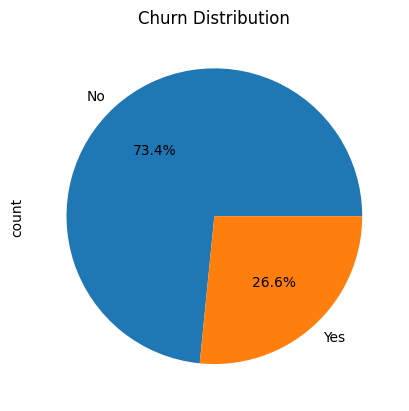

In [12]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Churn Distribution")
plt.show()


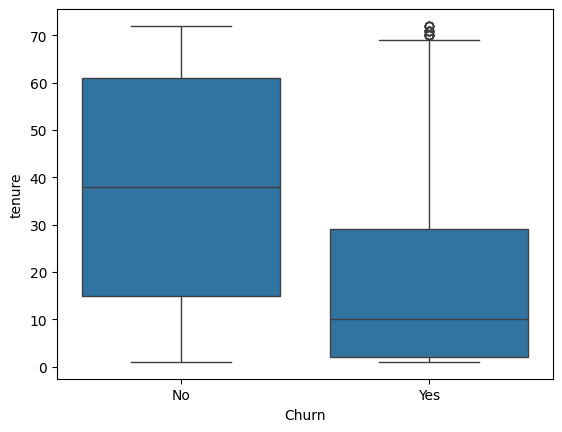

In [13]:
import seaborn as sns

sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()


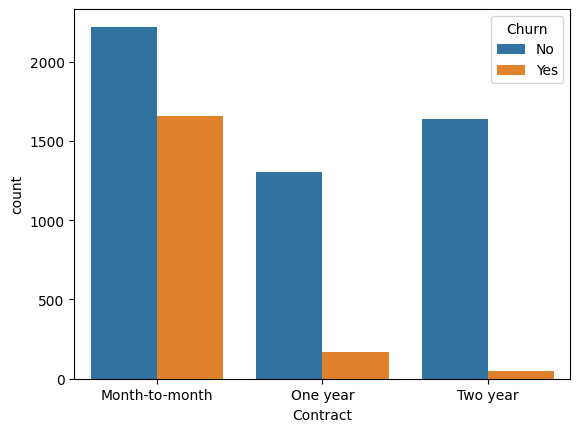

In [14]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7903340440653873
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



In [20]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

numerical_cols, categorical_cols


(Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
       dtype='object'),
 Index([], dtype='object'))

In [21]:
df[numerical_cols].describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,...,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,2283.300441,0.265785
std,2030.107879,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,...,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,401.450000,0.000000
50%,3515.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,5273.250000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [22]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("-" * 40)


In [23]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [26]:
# First, check which columns are categorical
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Encode all categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Verify changes
df.head()


Index([], dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
# Separate features and target
X = df.drop('Churn', axis=1)   # Features
y = df['Churn']                # Target variable

# Scale features (helps models like Logistic Regression, SVM)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify
X_scaled[:5]


array([[ 0.91110011, -1.00943013, -0.44032709,  1.03561683, -0.65230493,
        -1.28024804, -3.05633383,  0.0626661 , -1.18361379, -0.91783746,
         1.24287458, -1.02698755, -0.92426659, -1.11263165, -1.12150139,
        -0.82673477,  0.82893915,  0.39980518, -1.16169394, -0.99419409],
       [ 0.21552111,  0.99065797, -0.44032709, -0.9656081 , -0.65230493,
         0.06430269,  0.32718939, -0.99156363, -1.18361379,  1.40801227,
        -1.02899806,  1.24544054, -0.92426659, -1.11263165, -1.12150139,
         0.37392589, -1.20636117,  1.33663626, -0.26087792, -0.17373982],
       [-0.47168335,  0.99065797, -0.44032709, -0.9656081 , -0.65230493,
        -1.23950408,  0.32718939, -0.99156363, -1.18361379,  1.40801227,
         1.24287458, -1.02698755, -0.92426659, -1.11263165, -1.12150139,
        -0.82673477,  0.82893915,  1.33663626, -0.36392329, -0.95964911],
       [ 0.98942664,  0.99065797, -0.44032709, -0.9656081 , -0.65230493,
         0.51248626, -3.05633383,  0.0626661 , -

In [28]:
# 1. Split dataset into train and test
from sklearn.model_selection import train_test_split

# X_scaled is features, y is target
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Import a classifier (Logistic Regression as first model)
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7867803837953091
Confusion Matrix:
 [[922 111]
 [189 185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [29]:
# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train Decision Tree
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
from sklearn.metrics import accuracy_score, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Optional: Feature importance from Random Forest
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': df.drop('Churn', axis=1).columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:\n", feature_importance.head(10))


Logistic Regression Accuracy: 0.7867803837953091
Decision Tree Accuracy: 0.7299218194740583
Random Forest Accuracy: 0.7860696517412935

Top Features:
             Feature  Importance
19     TotalCharges    0.152603
18   MonthlyCharges    0.149936
5            tenure    0.136431
0        customerID    0.126720
15         Contract    0.085540
9    OnlineSecurity    0.044376
17    PaymentMethod    0.043136
12      TechSupport    0.036093
8   InternetService    0.023598
10     OnlineBackup    0.023139


In [30]:
# 1. Make final predictions (using best model, e.g., Random Forest)
final_predictions = rf_model.predict(X_scaled)

# 2. Add predictions to original dataframe
df['Churn_Predicted'] = final_predictions

# 3. Export cleaned dataset with predictions (optional)
df.to_csv("F:/telcocustomerchurn/Churn_Predicted.csv", index=False)

# 4. Summary / Insights
# Example: Top features contributing to churn
print("Top 5 features affecting churn:")
print(feature_importance.head(5))

# Example: How many customers are predicted to churn
print("\nNumber of customers predicted to churn:", df['Churn_Predicted'].sum())
print("Number of customers predicted to stay:", len(df) - df['Churn_Predicted'].sum())


Top 5 features affecting churn:
           Feature  Importance
19    TotalCharges    0.152603
18  MonthlyCharges    0.149936
5           tenure    0.136431
0       customerID    0.126720
15        Contract    0.085540

Number of customers predicted to churn: 1764
Number of customers predicted to stay: 5268


In [31]:
# 1. Add final predictions to your dataframe (if not done yet)
df['Churn_Predicted'] = rf_model.predict(X_scaled)

# 2. Export the dataframe with predictions to a CSV
df.to_csv("F:/telcocustomerchurn/Churn_Predicted.csv", index=False)

# 3. Optional: check first few rows
df[['customerID', 'Churn', 'Churn_Predicted']].head(10)


,customerID,Churn,Churn_Predicted
0,5365,0,0
1,3953,0,0
2,2558,1,1
3,5524,0,0
4,6500,1,1
5,6540,1,1
6,1001,0,0
7,4760,0,0
8,5593,1,1
9,4524,0,0


In [32]:
# Show first 10 rows with actual vs predicted churn
df[['customerID', 'Churn', 'Churn_Predicted']].head(10)

# Count how many customers are predicted to churn vs stay
df['Churn_Predicted'].value_counts()


Churn_Predicted
0    5268
1    1764
Name: count, dtype: int64

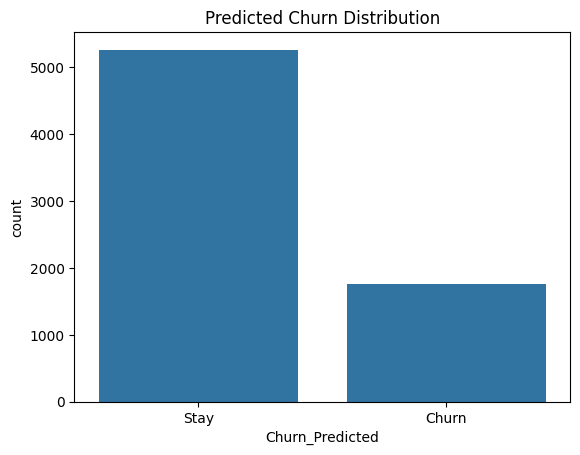

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn_Predicted', data=df)
plt.title("Predicted Churn Distribution")
plt.xticks([0,1], ['Stay', 'Churn'])
plt.show()
